<a href="https://www.kaggle.com/code/navisalomi/epl-data-analysis?scriptVersionId=184625897" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# English Premiership League 2020/21 Total Goals Scored Visualization

## Import Required Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # plotting library
import seaborn as sns # high-level visualization library

## Get file path

In [2]:
file = ""
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file = os.path.join(dirname, filename)

## Read Data

In [3]:
data = pd.read_excel(file)

In [4]:
data.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,2020-09-12,12:30:00,Fulham,Arsenal,0,3,A,0,1,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,2020-09-12,15:00:00,Crystal Palace,Southampton,1,0,H,1,0,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,2020-09-12,17:30:00,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,2020-09-12,20:00:00,West Ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,2020-09-13,14:00:00,West Brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97


In [5]:
# choose required columns
select_columns = data.columns[3:7]
new_data = data[select_columns]

In [6]:
# view the first 5 rows
new_data.head()

,HomeTeam,AwayTeam,FTHG,FTAG
0,Fulham,Arsenal,0,3
1,Crystal Palace,Southampton,1,0
2,Liverpool,Leeds,4,3
3,West Ham,Newcastle,0,2
4,West Brom,Leicester,0,3


In [7]:
# group data
grouped_data = new_data.groupby(by="HomeTeam")[["FTHG", "FTAG"]].sum()
grouped_data['Total Goals'] = grouped_data['FTHG'] + grouped_data['FTAG']
grouped_data.sort_values(by="Total Goals", ascending=False, inplace=True)
grouped_data.reset_index(inplace=True)
grouped_data

,HomeTeam,FTHG,FTAG,Total Goals
0,Man United,38,28,66
1,Leicester,34,30,64
2,Man City,43,17,60
3,Newcastle,26,33,59
4,Aston Villa,29,27,56
5,Tottenham,35,20,55
6,West Ham,32,22,54
7,West Brom,15,39,54
8,Southampton,28,25,53
9,Crystal Palace,20,32,52


## Plot the bar plot

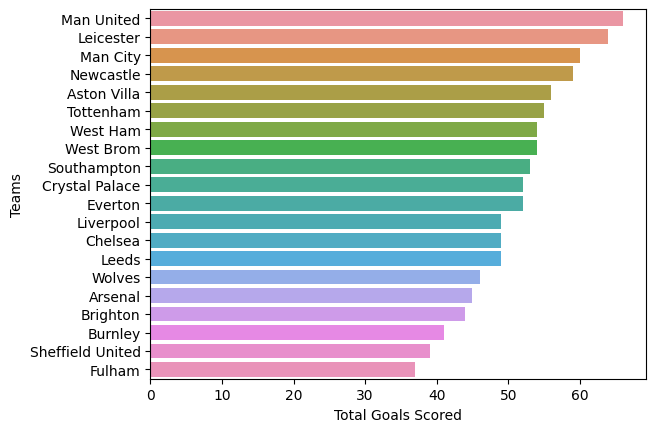

In [8]:
sns.barplot(data=grouped_data, x='Total Goals', y='HomeTeam')
plt.xlabel("Total Goals Scored")
plt.ylabel('Teams');

In [9]:
new_data

,HomeTeam,AwayTeam,FTHG,FTAG
0,Fulham,Arsenal,0,3
1,Crystal Palace,Southampton,1,0
2,Liverpool,Leeds,4,3
3,West Ham,Newcastle,0,2
4,West Brom,Leicester,0,3
...,...,...,...,...
375,Liverpool,Crystal Palace,2,0
376,Man City,Everton,5,0
377,Sheffield United,Burnley,1,0
378,West Ham,Southampton,3,0
